# Machine Learning Project

When complete, email me the jupyter notebook OR a python script as follows:
YourLastName_MachineLearingProj_040321

Assignment: Perform the following analyses on gum_disease_data.txt 
The features will be the bacterial species abundances and the classifier will be status. 

(1) Run a Decision Tree classifier.
(2) Run a Support Vector Machine analysis.
The next on is not graded ->
(3) NOT GRADED (for fun): Tensor flow neural network.

Helpful sites for Decision Tree code:
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
Plotting the decision trees:
https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn

(Some Random Forest code in case you are interested: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

For Support Vector Machine help see the HA3-checkpoint jupyter notebook or python script.

For Tensor Flow support (using Iris dataset):
https://www.kaggle.com/richbrosius/iris-classification-using-tensorflow

Better datasets for tensor flow:
https://www.tensorflow.org/tutorials/keras/basic_classification
https://adventuresinmachinelearning.com/python-tensorflow-tutorial/

## Data manipulation and plotting libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score

## Decision Tree libraries

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## SVM Libraries

In [6]:
from sklearn import svm
from sklearn.svm import LinearSVC

## Read in data set

In [127]:
##DO NOT CHANGE THIS LINE OF CODE
df=pd.read_csv('gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
df.head()

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


In [159]:
print(df)

      id  strep  prev  lepto  fuso  veil  time  status  pocket  deepest
0   S001   57.4  10.2    0.1   0.0   6.9     1       0     2.7      3.8
1   S001   26.0   0.0   25.6   0.0   6.3     2       0     2.7      3.0
2   S006   19.0  24.2    4.8   5.7   4.2     1       0     2.5      3.2
3   S006   15.2   4.2    0.2   2.6   3.4     2       0     2.4      3.2
4   S007   33.2   2.3    7.4   1.3  12.0     1       0     2.4      2.7
..   ...    ...   ...    ...   ...   ...   ...     ...     ...      ...
67  S063   24.8   2.5    9.1   7.0   3.2     2       0     2.7      3.7
68  S065    7.1  12.3    2.5  11.0   5.1     1       1     2.4      3.7
69  S065    1.8  10.2    9.0  15.7   6.3     2       1     2.7      3.3
70  S068   15.9  23.0    9.8   6.7   7.3     1       0     2.2      3.7
71  S068   16.8  11.6   27.1   7.9   2.2     2       0     2.8      4.2

[72 rows x 10 columns]


## Training set for all analyses

In [133]:
## FIX THIS EXAMPLE 
X = df.values[:,1:10]
Y = df.values[:,0]
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,df.columns!='id'], df['status'],
                                                   test_size = 0.33, random_state = 100)

## Part 1

## Decision Tree Analysis

In [134]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

## Generate Decision Tree

In [143]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=100, splitter='best')

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

## Show gini prediction

In [136]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1])

## Print accuracy

In [137]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  100.0


## Create dot file of Decision Tree

In [233]:
from sklearn import tree
from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(clf_gini,out_file='tree.dot',
        class_names = str(df.status),
        rounded = True, proportion = False,
        precision = 2, filled = True)

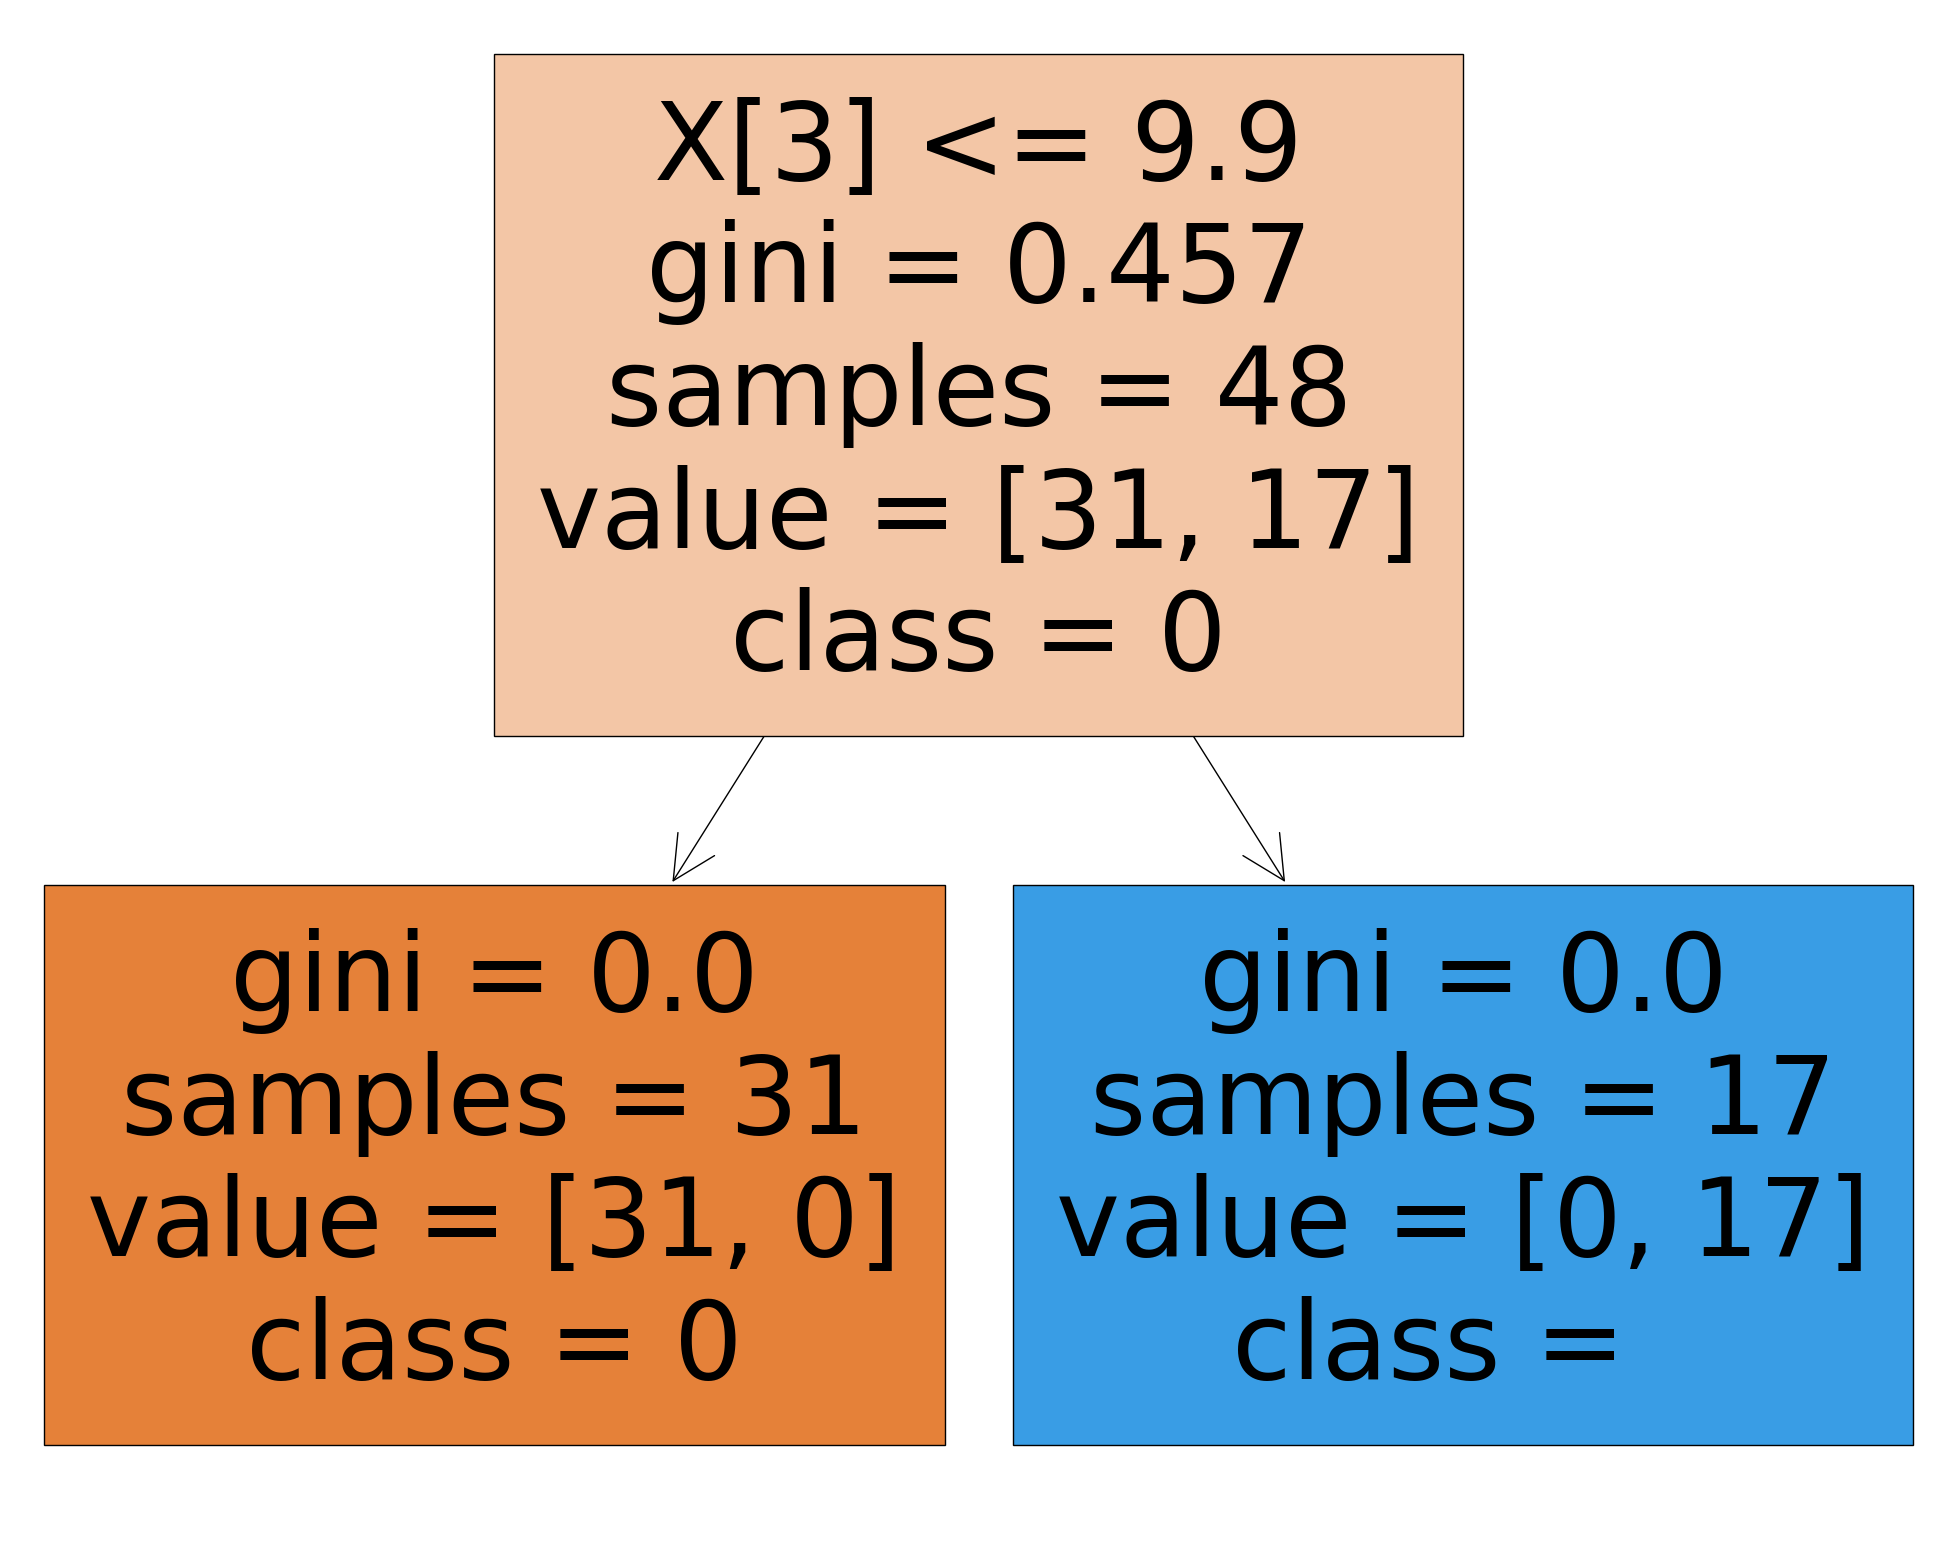

In [235]:
#Display in python
fig = plt.figure(figsize=(25,20))
tree_annotations = tree.plot_tree(clf_gini,
                                 class_names=str(df.status),
                                 filled=True)

## Part 2

## Support Vector Machine

In [138]:
df.status

0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    1
69    1
70    0
71    0
Name: status, Length: 72, dtype: int64

## Visualize the first 5 rows of the dataset

In [139]:
df.head()

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


## View pairwise plots of all bacteria features (strep, prev, lepto, fuso, veil) to find best combination of dimensions (clearest separation between class 0 and 1)

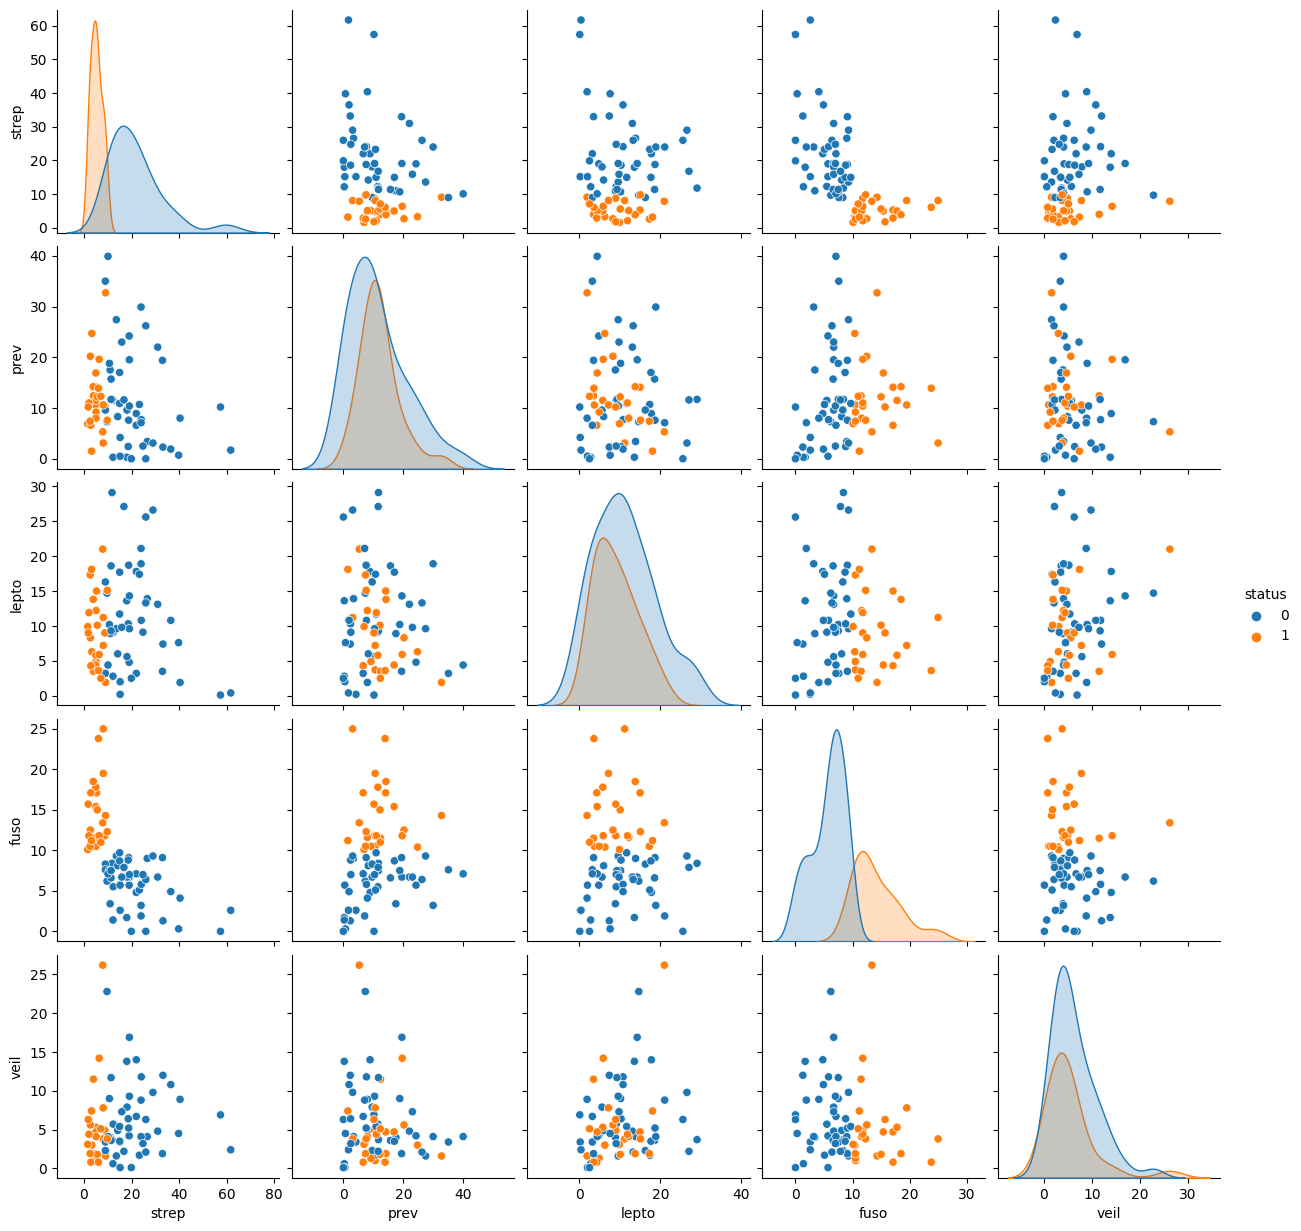

In [142]:
import seaborn as sns
sns.pairplot(df, vars = ['strep', 'prev', 'lepto', 'fuso', 'veil'], hue = 'status')


By looking at the clearest separation Fuso and Strep seem likely to be separated 

## Make the training and testing arrays

In [169]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,df.columns!='id'], df['status'],
                                                   test_size = 0.33, random_state = 100)

In [178]:
X_test.head()

,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
55,8.1,10.6,7.2,19.5,7.8,2,1,3.1,4.2
11,11.8,11.7,29.1,8.4,3.7,2,0,2.5,2.7
32,10.7,18.8,10.2,7.5,9.0,1,0,1.3,2.0
26,5.1,9.2,4.9,10.5,1.3,1,1,3.0,4.2
28,12.2,0.3,2.8,1.4,0.6,1,0,2.5,2.8


# Part A) Non-linear SVM Classifier

## Train the SVM model

In [170]:
training_array = []
train_pl_array = np.asarray(X_train['fuso'])
train_pw_array = np.asarray(X_train['strep'])
for i in range(0, len(train_pl_array)):
    pair = []
    pair.extend([train_pl_array[int(i)], train_pw_array[int(i)]])
    training_array.append(pair)
training_array = np.array(training_array)

In [171]:
testing_array = []
test_pl_array = np.asarray(X_test['fuso'])
test_pw_array = np.asarray(X_test['strep'])
for i in range(0, len(test_pl_array)):
    pair = []
    pair.extend([test_pl_array[int(i)], test_pw_array[int(i)]])
    testing_array.append(pair)
testing_array = np.array(testing_array)

In [172]:
y_train = np.array(y_train)
clf = svm.SVC(gamma= 'auto')
clf.fit(training_array, y_train)

SVC(gamma='auto')

## SVM model predictions on the test data

In [173]:
prediction = clf.predict(testing_array)
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1])

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

In [201]:
from sklearn.metrics import confusion_matrix
confuse = pd.DataFrame(confusion_matrix(y_test, prediction),
                       columns= ['Predicted Healthy', 'Predicted Not Healthy'],
                       index = ['True Healthy (status 0)', 'Not Healthy (status 1)'])
confuse

,Predicted Healthy,Predicted Not Healthy
True Healthy (status 0),15,0
Not Healthy (status 1),3,6


## Show Decision Boundary Plot

In [202]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X= testing_array, 
                      y=np.array(y_test),
                      clf=clf, 
                      legend=2)
plt.title('SVM Decision Boundary Region')

ModuleNotFoundError: No module named 'mlxtend'

# Part B) Linear SVM Classifier

## Train the linear classifier

In [203]:
from sklearn.svm import LinearSVC

In [204]:
clf = LinearSVC(random_state= 0, tol = 1e-5)
clf.fit(training_array, y_train)

LinearSVC(random_state=0, tol=1e-05)

In [205]:
prediction_2 = clf.predict(testing_array)
prediction_2

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1])

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

In [206]:
pd.DataFrame(confusion_matrix(prediction_2, y_test),
             columns = ['Predicted Healthy', 'Predicted Not Healthy'],
             index = ['True Healthy (status 0)', 'Not Healthy (status 1)'])

,Predicted Healthy,Predicted Not Healthy
True Healthy (status 0),15,0
Not Healthy (status 1),0,9


## Show Precision and Recall scores

In [207]:
precision_score(prediction_2, y_test)

1.0

In [208]:
recall_score(prediction_2, y_test)

1.0

## Show Decision Boundary Plot

In [209]:
plot_decision_regions(X= testing_array, 
                      y=np.array(y_test),
                      clf=clf, 
                      legend=2)
plt.title('SVM Decision Boundary Region')

NameError: name 'plot_decision_regions' is not defined

# Part C) Neural Network extra credit